# Topic : Unsupervised Machine Learning - Clustering K-MEANS & PCA

# Title : AIRLINE & PASSENGERS CLUSTERING ANALYSIS

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Load Data

Dataset Flight Contains of :

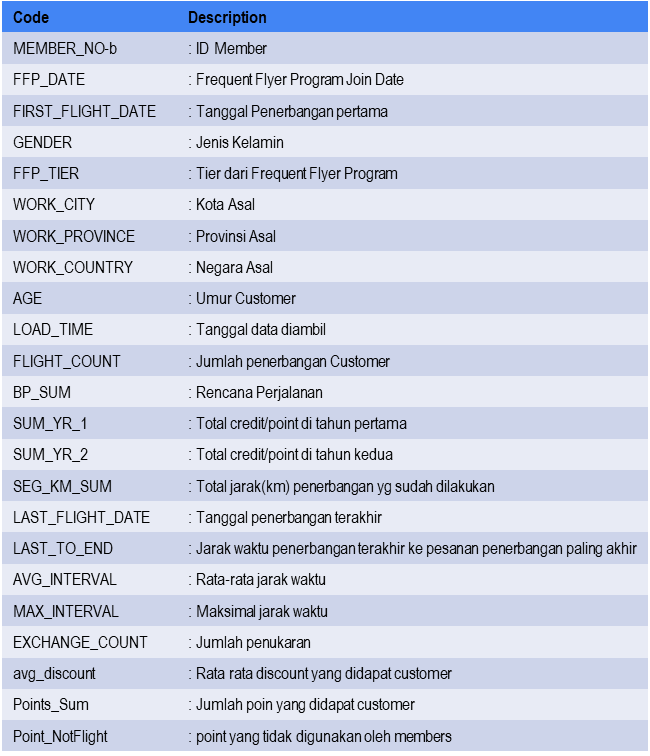

In [ ]:
# Load Dataset

df = pd.read_csv('dataset.csv')
df.sample(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
30358,24227,10/25/2012,11/8/2012,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,3527.0,14854,11/9/2013,144,22.875000,118,0,0.495081,4866,0
61941,4585,8/6/2010,3/18/2011,Female,4,guangzhou,guangdong,CN,48.0,3/31/2014,...,624.0,1968,4/3/2013,364,66.000000,66,0,0.444919,418,0
37852,6271,7/23/2012,7/23/2012,Male,4,shenzhenshi,guangdongsheng,CN,37.0,3/31/2014,...,423.0,6215,6/16/2013,290,82.000000,237,0,0.829216,5418,1
46507,1135,4/28/2007,8/1/2007,Male,4,tangshan,hebei,CN,57.0,3/31/2014,...,2226.0,3582,9/29/2013,185,236.500000,471,0,0.935410,3372,0
41925,22063,3/5/2009,3/5/2009,Male,4,shanghai,shanghai,CN,35.0,3/31/2014,...,2912.0,8510,10/23/2013,161,110.600000,210,0,0.497281,2794,0
1864,17742,5/28/2007,5/28/2007,Male,6,dalian,liaoning,CN,45.0,3/31/2014,...,25021.0,75480,3/25/2014,7,9.808824,45,4,0.720937,46780,5
23060,13281,9/8/2009,9/8/2009,Male,4,haerbin,heilongjiang,CN,44.0,3/31/2014,...,5341.0,18287,3/24/2014,8,52.700000,160,0,0.575249,7906,0
21364,17453,6/10/2010,7/15/2010,Male,4,wulumuqi,xinjiang,CN,42.0,3/31/2014,...,2436.0,18788,1/10/2014,82,69.000000,475,0,0.608395,13169,0
12504,36032,12/29/2009,5/3/2010,Male,4,guangzhou,guangdong,CN,40.0,3/31/2014,...,12493.0,32598,12/14/2013,109,26.045455,192,0,0.567353,24170,31
29518,17151,5/19/2012,9/7/2012,Male,4,shenzhen,guangdong,CN,53.0,3/31/2014,...,1575.0,10851,8/24/2013,221,87.750000,146,0,0.706004,7191,0


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## Data Cleaning

### Duplicate Values

In [ ]:
df.duplicated().sum()

0

# Missing Values

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
#Fill the numerical columns

df['AGE'] = df['AGE'].fillna(df['AGE'].median())


In [ ]:
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
# drop the high missing value columns

# WORK_CITY & WORK_PROVINCE

df = df.drop(['WORK_CITY','WORK_PROVINCE'], axis = 1)

In [ ]:
df.isna().sum()

MEMBER_NO             0
FFP_DATE              0
FIRST_FLIGHT_DATE     0
GENDER                3
FFP_TIER              0
WORK_COUNTRY         26
AGE                   0
LOAD_TIME             0
FLIGHT_COUNT          0
BP_SUM                0
SUM_YR_1              0
SUM_YR_2              0
SEG_KM_SUM            0
LAST_FLIGHT_DATE      0
LAST_TO_END           0
AVG_INTERVAL          0
MAX_INTERVAL          0
EXCHANGE_COUNT        0
avg_discount          0
Points_Sum            0
Point_NotFlight       0
dtype: int64

## Descriptive Analysis

In [ ]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.466502,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.853632,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Insight :

- FFP_TIER, mostly the passengers from tier frequent number 4
- FLIGHT_COUNT, frequent passengers in flight.

- Points_Sum vs Point_NotFlight, flight passengers seems sensitive for using a claim points. Because the average of Point_NotFlight only 2.728155.


In [ ]:
cats= ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']

df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,62962,62988,62988
unique,3068,3406,2,118,1,731
top,1/13/2011,2/16/2013,Male,CN,3/31/2014,3/31/2014
freq,184,96,48134,57748,62988,959


Insight :

* Range of dataset = 4 Years (2011 - 2014)


## Exploratory Data Analysis

# Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_COUNTRY       62962 non-null  object 
 6   AGE                62988 non-null  float64
 7   LOAD_TIME          62988 non-null  object 
 8   FLIGHT_COUNT       62988 non-null  int64  
 9   BP_SUM             62988 non-null  int64  
 10  SUM_YR_1           62988 non-null  float64
 11  SUM_YR_2           62988 non-null  float64
 12  SEG_KM_SUM         62988 non-null  int64  
 13  LAST_FLIGHT_DATE   62988 non-null  object 
 14  LAST_TO_END        62988 non-null  int64  
 15  AVG_INTERVAL       62988 non-null  float64
 16  MAX_INTERVAL       629

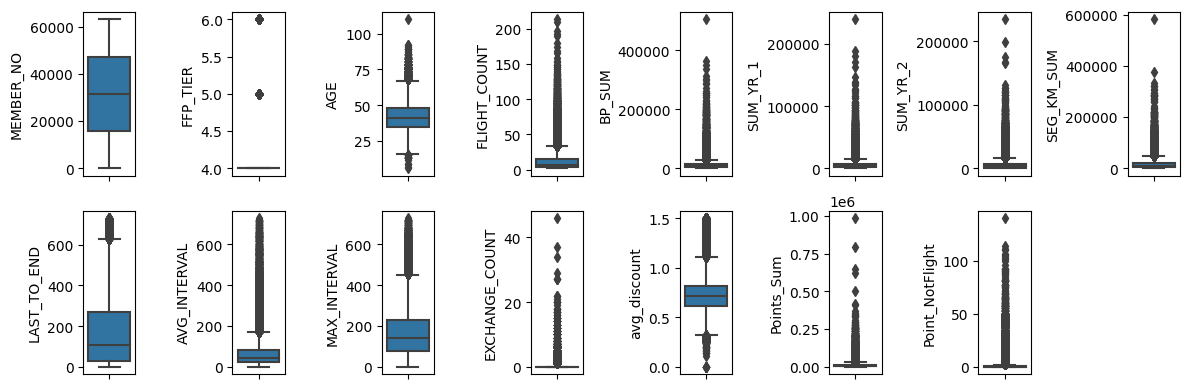

In [ ]:
#visualize

plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

There are an Outliers

- FFP TIER
- AGE
- BP_SUM
- SUM_YR_1
- SUM_YR_2
- SEG_KM_SUM
- EXCHANGE_COUNT
- avg_discount
- Points_Sum
- Point_Not_Flight

## Deep Dive

In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,CN,31.0,3/31/2014,210,505308,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,CN,42.0,3/31/2014,140,362480,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,CN,40.0,3/31/2014,135,351159,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,US,64.0,3/31/2014,23,337314,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,CN,48.0,3/31/2014,152,273844,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


#### Categorical Columns Analysis

<Axes: xlabel='FFP_TIER', ylabel='FLIGHT_COUNT'>

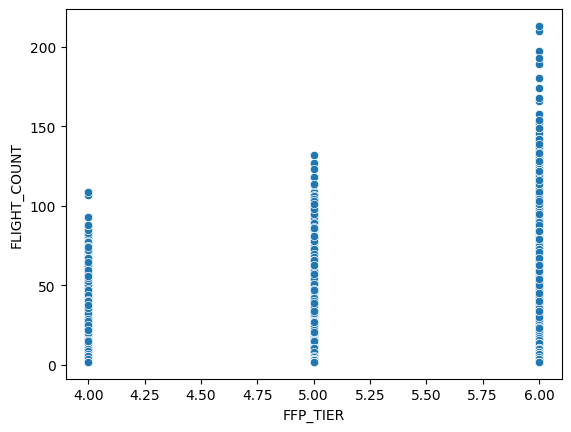

In [ ]:
#visualize the FFP_TIER vs FLIGHT_COUNT

sns.scatterplot(x=df['FFP_TIER'],
                y=df['FLIGHT_COUNT'])

In [ ]:
df['FFP_TIER'].value_counts()

4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64

In [ ]:
df['FLIGHT_COUNT'].isnull().value_counts()

False    62988
Name: FLIGHT_COUNT, dtype: int64

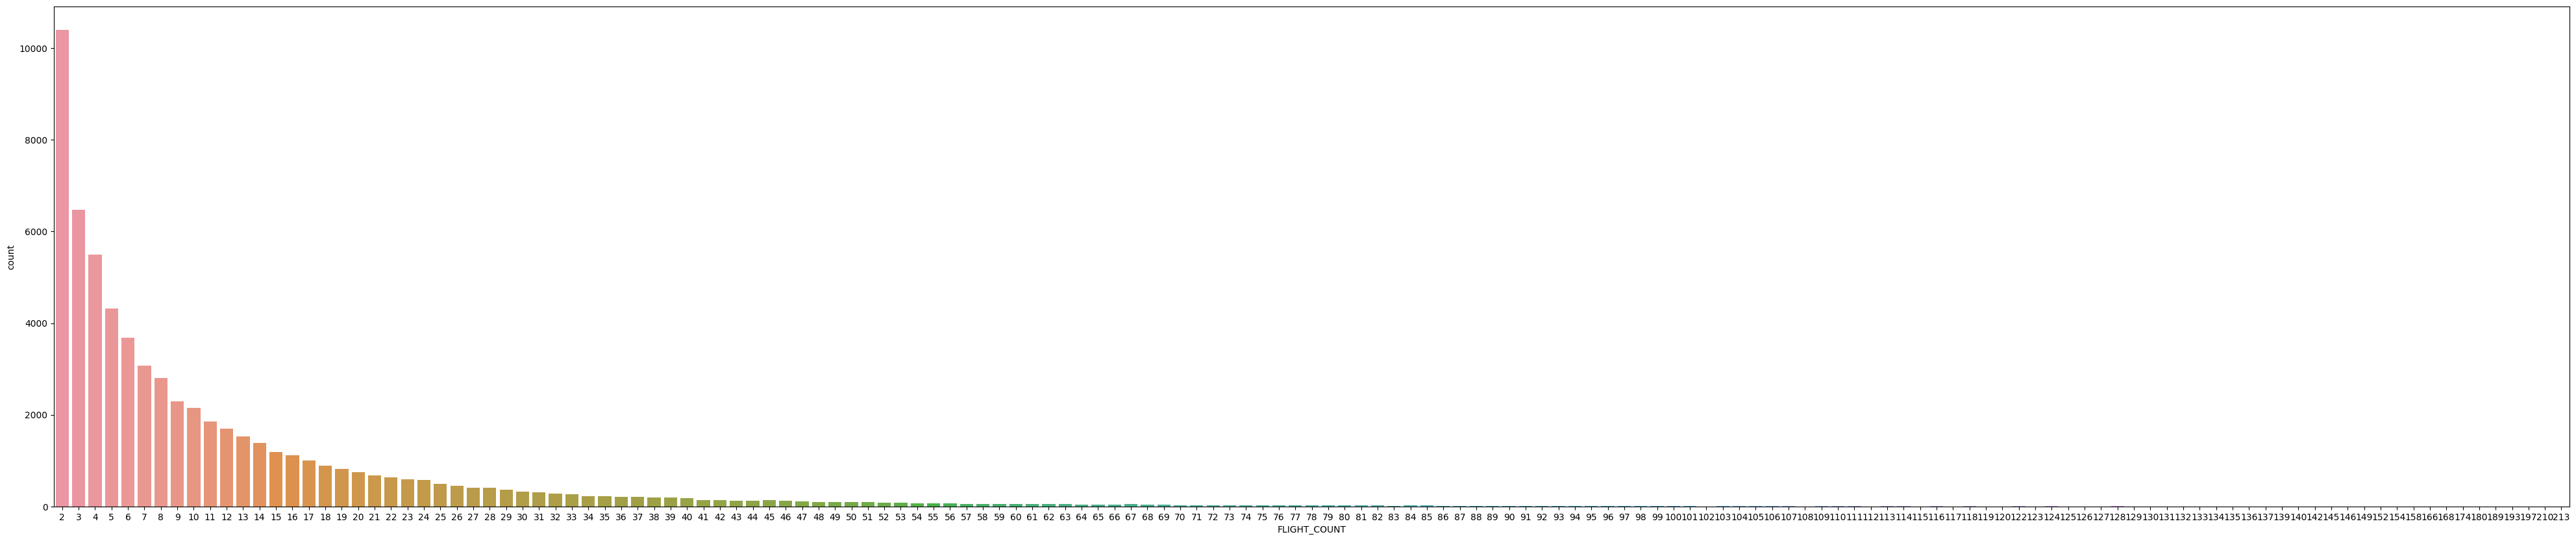

In [ ]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x="FLIGHT_COUNT", data=df)

Insight : The chart shows that the frequent passengers flight count are positive skeweness.

The extreme outliers = 123x flight count

In [19]:
df['LAST_TO_END'].value_counts()

1      959
2      933
4      924
3      779
5      767
      ... 
718      6
726      3
730      3
728      3
731      1
Name: LAST_TO_END, Length: 731, dtype: int64

In [20]:
df['LAST_TO_END'].isnull().value_counts()

False    62988
Name: LAST_TO_END, dtype: int64

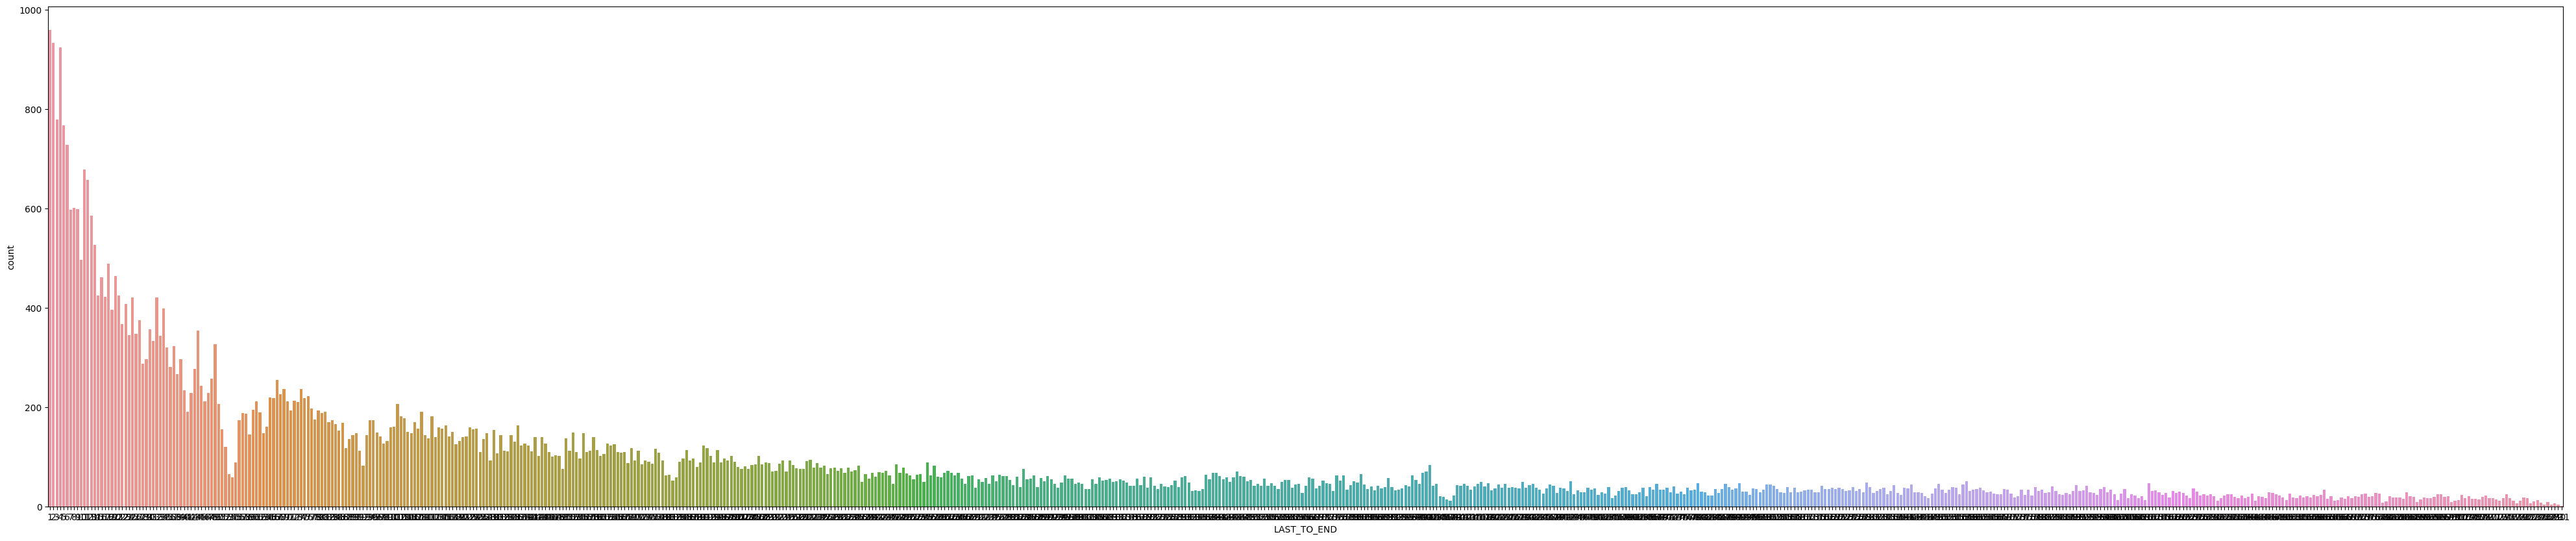

In [21]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x="LAST_TO_END", data=df)

Insight : The chart shows - positive skeweness.

There are an extreme outliers

In [22]:
# converting 'AGE' to int data type

df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce').astype(int)

In [23]:
age_dist = df.groupby('AGE',as_index=False).size().sort_values(['size'],ascending = False).reset_index(drop = True)

age_dist.head(10)

,AGE,size
0,41,2884
1,47,2727
2,38,2713
3,37,2683
4,42,2622
5,39,2595
6,40,2549
7,36,2335
8,46,2323
9,35,2265


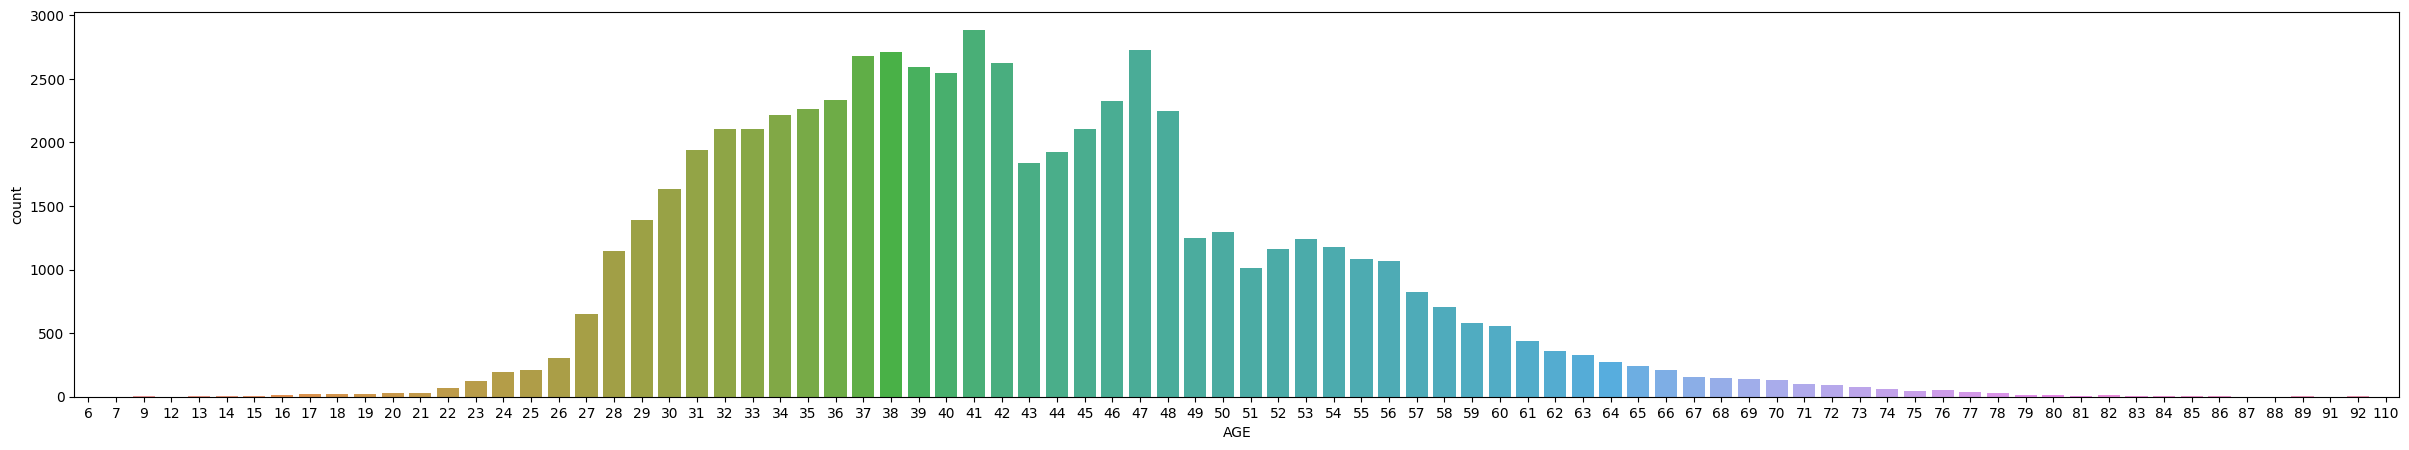

In [24]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="AGE", data=df)

Summary:

From the chart 'AGE' & 'GENDER', its clarified that the passengers distribution around productive age between 24 Y - 60 Y and mostly are 'Male'. We are assume that the passengers travel purpose for business trips.

From the WORK_COUNTRY provided that the majority of business trips are around ASIA countries, top of charts are CHINA, HK, JAPAN.  

For the loyality point of view :
- The loyal passengers are applied avg_discount .
- The loyal passengers can be seen from the flight_count per year and member
- The old passengers can be seen from FIRST_FLIGHT DATE and FFP_DATE
- The frequent & loyal passengers could be placed in FFP tier 5 & 6 , FLIGHT_COUNT more than 50x / Y


### Data Cleaning Part 2

In [25]:
df.isna().sum()

MEMBER_NO             0
FFP_DATE              0
FIRST_FLIGHT_DATE     0
GENDER                3
FFP_TIER              0
WORK_COUNTRY         26
AGE                   0
LOAD_TIME             0
FLIGHT_COUNT          0
BP_SUM                0
SUM_YR_1              0
SUM_YR_2              0
SEG_KM_SUM            0
LAST_FLIGHT_DATE      0
LAST_TO_END           0
AVG_INTERVAL          0
MAX_INTERVAL          0
EXCHANGE_COUNT        0
avg_discount          0
Points_Sum            0
Point_NotFlight       0
dtype: int64

In [26]:
# Column Gender & WORK_COUNTRY are not relate with the target analysis

df = df.drop(['GENDER','WORK_COUNTRY'], axis = 1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   FFP_TIER           62988 non-null  int64  
 4   AGE                62988 non-null  int64  
 5   LOAD_TIME          62988 non-null  object 
 6   FLIGHT_COUNT       62988 non-null  int64  
 7   BP_SUM             62988 non-null  int64  
 8   SUM_YR_1           62988 non-null  float64
 9   SUM_YR_2           62988 non-null  float64
 10  SEG_KM_SUM         62988 non-null  int64  
 11  LAST_FLIGHT_DATE   62988 non-null  object 
 12  LAST_TO_END        62988 non-null  int64  
 13  AVG_INTERVAL       62988 non-null  float64
 14  MAX_INTERVAL       62988 non-null  int64  
 15  EXCHANGE_COUNT     62988 non-null  int64  
 16  avg_discount       629

### Deep Dive Cont'

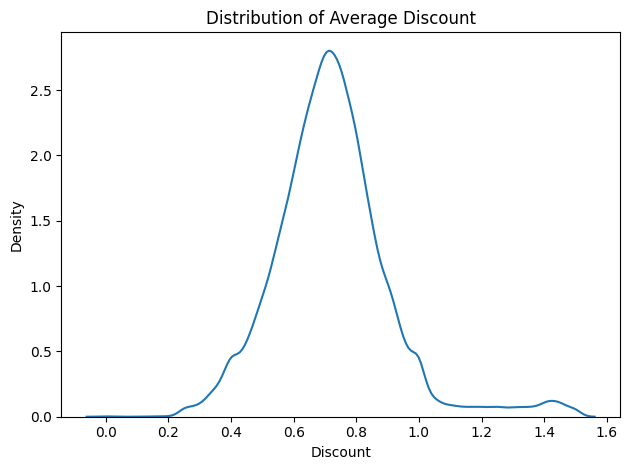

In [28]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

In [29]:
df['avg_discount'].value_counts()

1.000000    757
0.400000    413
0.800000    391
0.750000    370
0.700000    311
           ... 
0.612868      1
1.350971      1
0.729185      1
0.652657      1
0.526771      1
Name: avg_discount, Length: 54179, dtype: int64

In [30]:
df = df[df['avg_discount']<=1]

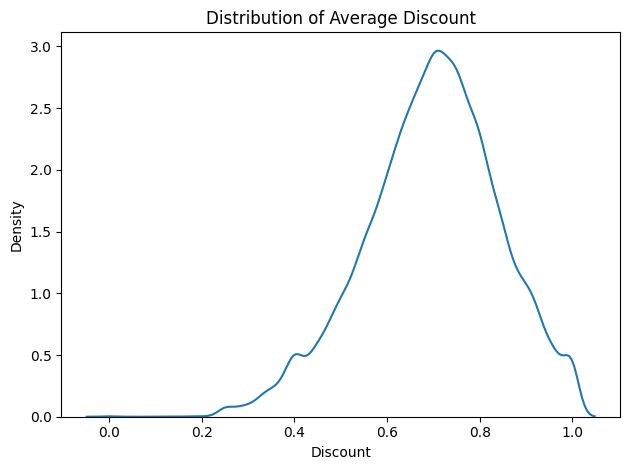

In [31]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

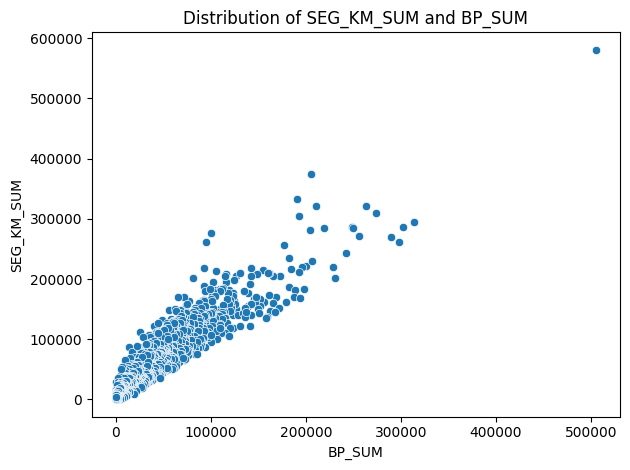

In [32]:
ax = sns.scatterplot(x = 'BP_SUM', y = 'SEG_KM_SUM',  data=df)
ax.set_title("Distribution of SEG_KM_SUM and BP_SUM")
ax.set_ylabel("SEG_KM_SUM")
ax.set_xlabel("BP_SUM")
plt.tight_layout()

### Heatmap Analysis

<Axes: >

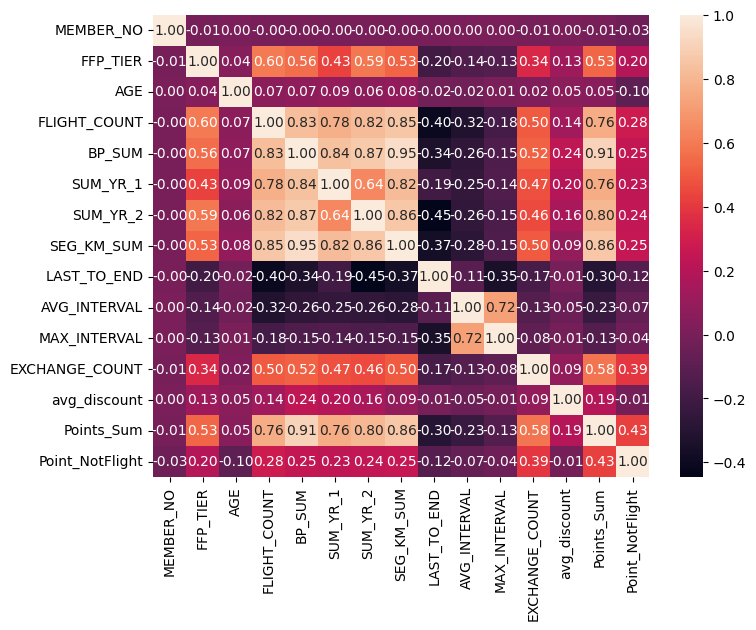

In [33]:
# correlation heatmap

plt.figure(figsize=(8,6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

## Feature Selection 1

According to the correlation heatmap:

* Features with Negative Correlation will be droped from the dataset :    

Features are not correlated : 'MEMBER_NO', 'AGE' , 'LAST TO END' , 'AVG_INTERVAL', 'MAX_INTERVAL' , 'AVG_DISCOUNT' , 'POINT_NOTFLIGHT'

BP_SUM can represent SUM_YR_1 & SUM_YR_2

EXCHANGE_COUNT = Points_Sum


In [34]:
dfx = df.copy()

In [35]:
dfx = dfx.drop(['MEMBER_NO','EXCHANGE_COUNT','SUM_YR_1','SUM_YR_2','Point_NotFlight','AVG_INTERVAL','MAX_INTERVAL'], axis = 1)

In [36]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Points_Sum
0,11/2/2006,12/24/2008,6,31,3/31/2014,210,505308,580717,3/31/2014,1,0.961639,619760
4,4/10/2009,4/15/2009,6,48,3/31/2014,152,273844,309928,3/27/2014,5,0.970658,338813
5,2/10/2008,9/29/2009,6,64,3/31/2014,92,313338,294585,1/13/2014,79,0.967692,343121
6,3/22/2006,3/29/2006,6,46,3/31/2014,101,248864,287042,3/31/2014,1,0.965347,298873
7,4/9/2010,4/9/2010,6,50,3/31/2014,73,301864,287230,3/29/2014,3,0.962070,351198


<Axes: >

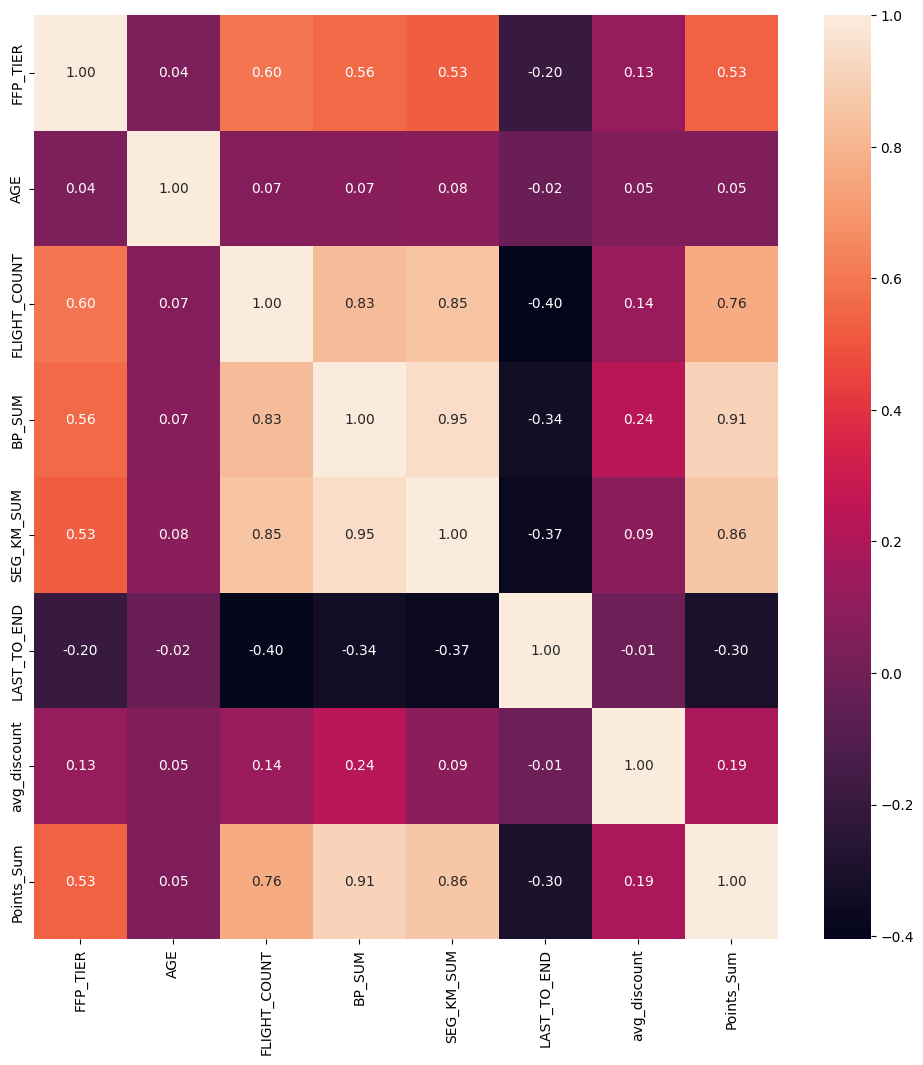

In [37]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfx.corr(), annot=True, fmt='.2f')

## Feature Selection 2

Refers to [ebook](https://books.google.co.id/books?id=CcH4DwAAQBAJ&pg=PA95&lpg=PA95&dq=chinese+member+airline+data+customer+bp_sum&source=bl&ots=MuNwvzNnN-&sig=ACfU3U0hPyubVpBG7RGuxmQgm9Zn7m2g6g&hl=en&sa=X&ved=2ahUKEwjZsKzHy7LsAhWZaCsKHW9XDW8Q6AEwCHoECAoQAg#v=onepage&q=chinese%20member%20airline%20data%20customer%20bp_sum&f=false) and correlation heatmap :

*  The important features : Refers to the ebook! which is choosing  LRFMC model and features used : **`load_time`, `ffp_date`, `last_to_end`, `flight_count`, `seg_km_sum`, `avg_discount`**

*   EDA step 2 - high correlation between `bp_sum`  `seg_km_sum`, and `point_sum`. Otherwise in this model, which is using `seg_km_sum` so that `bp_sum` and `point_sum` will be drop to decrease the multicolinearity.

In [38]:
dfx = dfx.drop(['BP_SUM','Points_Sum'], axis = 1)

In [39]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
0,11/2/2006,12/24/2008,6,31,3/31/2014,210,580717,3/31/2014,1,0.961639
4,4/10/2009,4/15/2009,6,48,3/31/2014,152,309928,3/27/2014,5,0.970658
5,2/10/2008,9/29/2009,6,64,3/31/2014,92,294585,1/13/2014,79,0.967692
6,3/22/2006,3/29/2006,6,46,3/31/2014,101,287042,3/31/2014,1,0.965347
7,4/9/2010,4/9/2010,6,50,3/31/2014,73,287230,3/29/2014,3,0.962070


## FEATURE ENGINEERING

add columns passengers_time

In [40]:
dfa = dfx.copy()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           60041 non-null  object 
 1   FIRST_FLIGHT_DATE  60041 non-null  object 
 2   FFP_TIER           60041 non-null  int64  
 3   AGE                60041 non-null  int64  
 4   LOAD_TIME          60041 non-null  object 
 5   FLIGHT_COUNT       60041 non-null  int64  
 6   SEG_KM_SUM         60041 non-null  int64  
 7   LAST_FLIGHT_DATE   60041 non-null  object 
 8   LAST_TO_END        60041 non-null  int64  
 9   avg_discount       60041 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 5.0+ MB


In [41]:
dfa[dfa['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
832,7/13/2005,8/6/2005,5,40,3/31/2014,80,114222,2014/2/29 0:00:00,32,0.664970
1292,11/23/2010,11/23/2010,5,57,3/31/2014,64,93264,2014/2/29 0:00:00,32,0.682162
1294,12/15/2012,1/5/2013,4,59,3/31/2014,67,89045,2014/2/29 0:00:00,32,0.714237
1400,1/20/2011,1/20/2011,5,34,3/31/2014,58,90921,2014/2/29 0:00:00,32,0.676097
1434,2/12/2009,2/13/2009,5,41,3/31/2014,58,74908,2014/2/29 0:00:00,32,0.810649
...,...,...,...,...,...,...,...,...,...,...
61539,1/11/2013,7/10/2013,4,23,3/31/2014,3,3513,2014/2/29 0:00:00,32,0.276667
61871,7/26/2009,7/26/2009,4,37,3/31/2014,2,1298,2014/2/29 0:00:00,32,0.690000
61909,4/11/2011,4/20/2011,4,34,3/31/2014,2,2595,2014/2/29 0:00:00,32,0.340000
62721,10/31/2007,3/13/2008,4,42,3/31/2014,2,1199,2014/2/29 0:00:00,32,0.489525


In [42]:
dfa['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [43]:
cats = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
dfa[cats] = dfa[cats].astype('category')

In [44]:
dfa_cat=dfa.select_dtypes(include='category')

dfa_cat.head(5)

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
0,11/2/2006,12/24/2008,3/31/2014,3/31/2014
4,4/10/2009,4/15/2009,3/31/2014,3/27/2014
5,2/10/2008,9/29/2009,3/31/2014,1/13/2014
6,3/22/2006,3/29/2006,3/31/2014,3/31/2014
7,4/9/2010,4/9/2010,3/31/2014,3/29/2014


In [45]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

dfa_num=dfa.select_dtypes(include=numeric)
dfa_num.describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,60041.0,4.081727,0.328371,4.0,4.000000,4.00000,4.000000,6.0
AGE,60041.0,42.167186,9.740345,6.0,35.000000,41.00000,48.000000,110.0
FLIGHT_COUNT,60041.0,11.654220,13.756290,2.0,3.000000,7.00000,14.000000,210.0
SEG_KM_SUM,60041.0,16772.027931,20335.635374,368.0,4713.000000,9878.00000,20893.000000,580717.0
LAST_TO_END,60041.0,177.260855,184.117824,1.0,30.000000,109.00000,270.000000,731.0
avg_discount,60041.0,0.695875,0.144030,0.0,0.605626,0.70339,0.794527,1.0


In [46]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   FFP_DATE           60041 non-null  category
 1   FIRST_FLIGHT_DATE  60041 non-null  category
 2   FFP_TIER           60041 non-null  int64   
 3   AGE                60041 non-null  int64   
 4   LOAD_TIME          60041 non-null  category
 5   FLIGHT_COUNT       60041 non-null  int64   
 6   SEG_KM_SUM         60041 non-null  int64   
 7   LAST_FLIGHT_DATE   60041 non-null  category
 8   LAST_TO_END        60041 non-null  int64   
 9   avg_discount       60041 non-null  float64 
dtypes: category(4), float64(1), int64(5)
memory usage: 3.9 MB


### Data Manipulation

In [47]:
## data manipulation to convert date

dfa["LOAD_TIME"] = pd.to_datetime(dfa["LOAD_TIME"])
dfa["FFP_DATE"] = pd.to_datetime(dfa["FFP_DATE"])
dfa["FIRST_FLIGHT_DATE"] = pd.to_datetime(dfa["FIRST_FLIGHT_DATE"])
dfa["LAST_FLIGHT_DATE"] = pd.to_datetime(dfa["LAST_FLIGHT_DATE"])
dfa["LOAD_TIME"] = dfa["LOAD_TIME"].values.astype('datetime64[ns]')
dfa["FFP_DATE"] = dfa["FFP_DATE"].values.astype('datetime64[ns]')
dfa["FIRST_FLIGHT_DATE"] = dfa["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
dfa["LAST_FLIGHT_DATE"] = dfa["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

In [48]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           60041 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 2   FFP_TIER           60041 non-null  int64         
 3   AGE                60041 non-null  int64         
 4   LOAD_TIME          60041 non-null  datetime64[ns]
 5   FLIGHT_COUNT       60041 non-null  int64         
 6   SEG_KM_SUM         60041 non-null  int64         
 7   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 8   LAST_TO_END        60041 non-null  int64         
 9   avg_discount       60041 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(5)
memory usage: 5.0 MB


In [49]:
dfa['passenger_time'] = (dfa['LOAD_TIME'] - dfa['FFP_DATE'])/np.timedelta64(1,'M')

In [50]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,passenger_time
0,2006-11-02,2008-12-24,6,31,2014-03-31,210,580717,2014-03-31,1,0.961639,88.905316
4,2009-04-10,2009-04-15,6,48,2014-03-31,152,309928,2014-03-27,5,0.970658,59.664469
5,2008-02-10,2009-09-29,6,64,2014-03-31,92,294585,2014-01-13,79,0.967692,73.627795
6,2006-03-22,2006-03-29,6,46,2014-03-31,101,287042,2014-03-31,1,0.965347,96.297665
7,2010-04-09,2010-04-09,6,50,2014-03-31,73,287230,2014-03-29,3,0.962070,47.705292


In [51]:
dfa['Flight_Count/Year']= dfa['FLIGHT_COUNT']/ ((dfa['LAST_FLIGHT_DATE'] - dfa['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))

In [52]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,passenger_time,Flight_Count/Year
0,2006-11-02,2008-12-24,6,31,2014-03-31,210,580717,2014-03-31,1,0.961639,88.905316,39.886076
4,2009-04-10,2009-04-15,6,48,2014-03-31,152,309928,2014-03-27,5,0.970658,59.664469,30.723221
5,2008-02-10,2009-09-29,6,64,2014-03-31,92,294585,2014-01-13,79,0.967692,73.627795,21.443720
6,2006-03-22,2006-03-29,6,46,2014-03-31,101,287042,2014-03-31,1,0.965347,96.297665,12.616106
7,2010-04-09,2010-04-09,6,50,2014-03-31,73,287230,2014-03-29,3,0.962070,47.705292,18.388071


In [53]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           60041 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 2   FFP_TIER           60041 non-null  int64         
 3   AGE                60041 non-null  int64         
 4   LOAD_TIME          60041 non-null  datetime64[ns]
 5   FLIGHT_COUNT       60041 non-null  int64         
 6   SEG_KM_SUM         60041 non-null  int64         
 7   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 8   LAST_TO_END        60041 non-null  int64         
 9   avg_discount       60041 non-null  float64       
 10  passenger_time     60041 non-null  float64       
 11  Flight_Count/Year  60041 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(5)
memory usage: 6.0 MB


In [54]:
dfa = dfa.drop(['FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','FLIGHT_COUNT'], axis = 1)

In [55]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_TIER           60041 non-null  int64  
 1   AGE                60041 non-null  int64  
 2   SEG_KM_SUM         60041 non-null  int64  
 3   LAST_TO_END        60041 non-null  int64  
 4   avg_discount       60041 non-null  float64
 5   passenger_time     60041 non-null  float64
 6   Flight_Count/Year  60041 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.7 MB


### Data Cleaning Check

In [56]:
dfa.head()

,FFP_TIER,AGE,SEG_KM_SUM,LAST_TO_END,avg_discount,passenger_time,Flight_Count/Year
0,6,31,580717,1,0.961639,88.905316,39.886076
4,6,48,309928,5,0.970658,59.664469,30.723221
5,6,64,294585,79,0.967692,73.627795,21.443720
6,6,46,287042,1,0.965347,96.297665,12.616106
7,6,50,287230,3,0.962070,47.705292,18.388071


In [57]:
dfa.isnull().sum()

FFP_TIER             0
AGE                  0
SEG_KM_SUM           0
LAST_TO_END          0
avg_discount         0
passenger_time       0
Flight_Count/Year    0
dtype: int64

## Handle Outliers

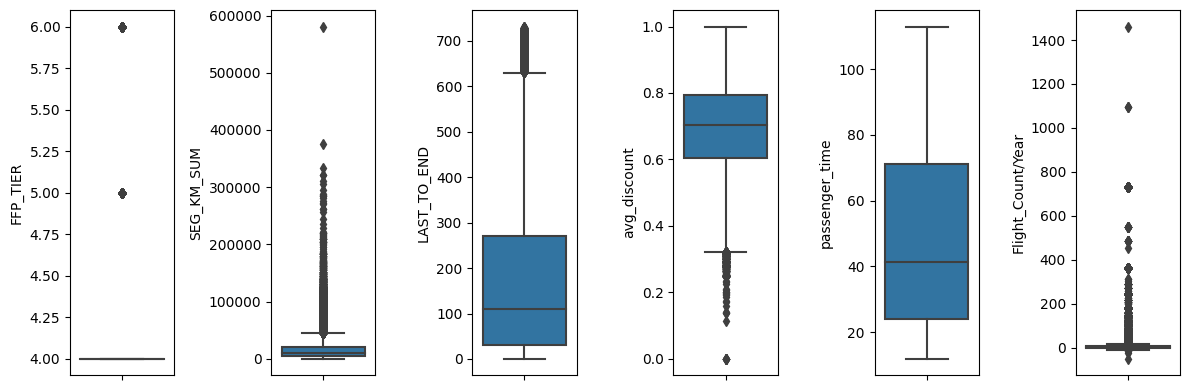

In [58]:
nums=['FFP_TIER','SEG_KM_SUM','LAST_TO_END','avg_discount','passenger_time','Flight_Count/Year']
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = dfa[nums[i]], orient='v')
    plt.tight_layout()

In [59]:
print(f'Length of Outliers: {len(dfa)}')

fil_ent = np.array([True] * len(dfa))
for col in ['SEG_KM_SUM','LAST_TO_END','avg_discount','passenger_time','Flight_Count/Year']:

    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((dfa[col] >= low_limit) & (dfa[col] <= high_limit)) & fil_ent

dfa = dfa[fil_ent].reset_index()

print('Length of Outliers:', len(dfa))

Length of Outliers: 60041
Length of Outliers: 48882


In [60]:
dfa = dfa.drop(['FFP_TIER'], axis = 1)

# Modeling & Evaluation

In [61]:
dfa =dfa[~dfa.isin([np.nan, np.inf, -np.inf]).any(1)]

## Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

feats = ['SEG_KM_SUM','LAST_TO_END','avg_discount','passenger_time','Flight_Count/Year']
X = dfa[feats].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feats)

In [63]:
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,passenger_time,Flight_Count/Year
0,2.946823,-0.433412,2.186105,-0.640830,2.364728
1,3.151836,-0.776593,1.816499,0.463661,0.441358
2,3.006257,-0.242755,2.044803,2.258308,-0.290352
3,3.039276,1.225298,1.937261,0.669624,-0.609352
4,3.069732,-0.871921,1.869654,0.002352,1.326259


## Clustering: K-means

###Best K

<Axes: >

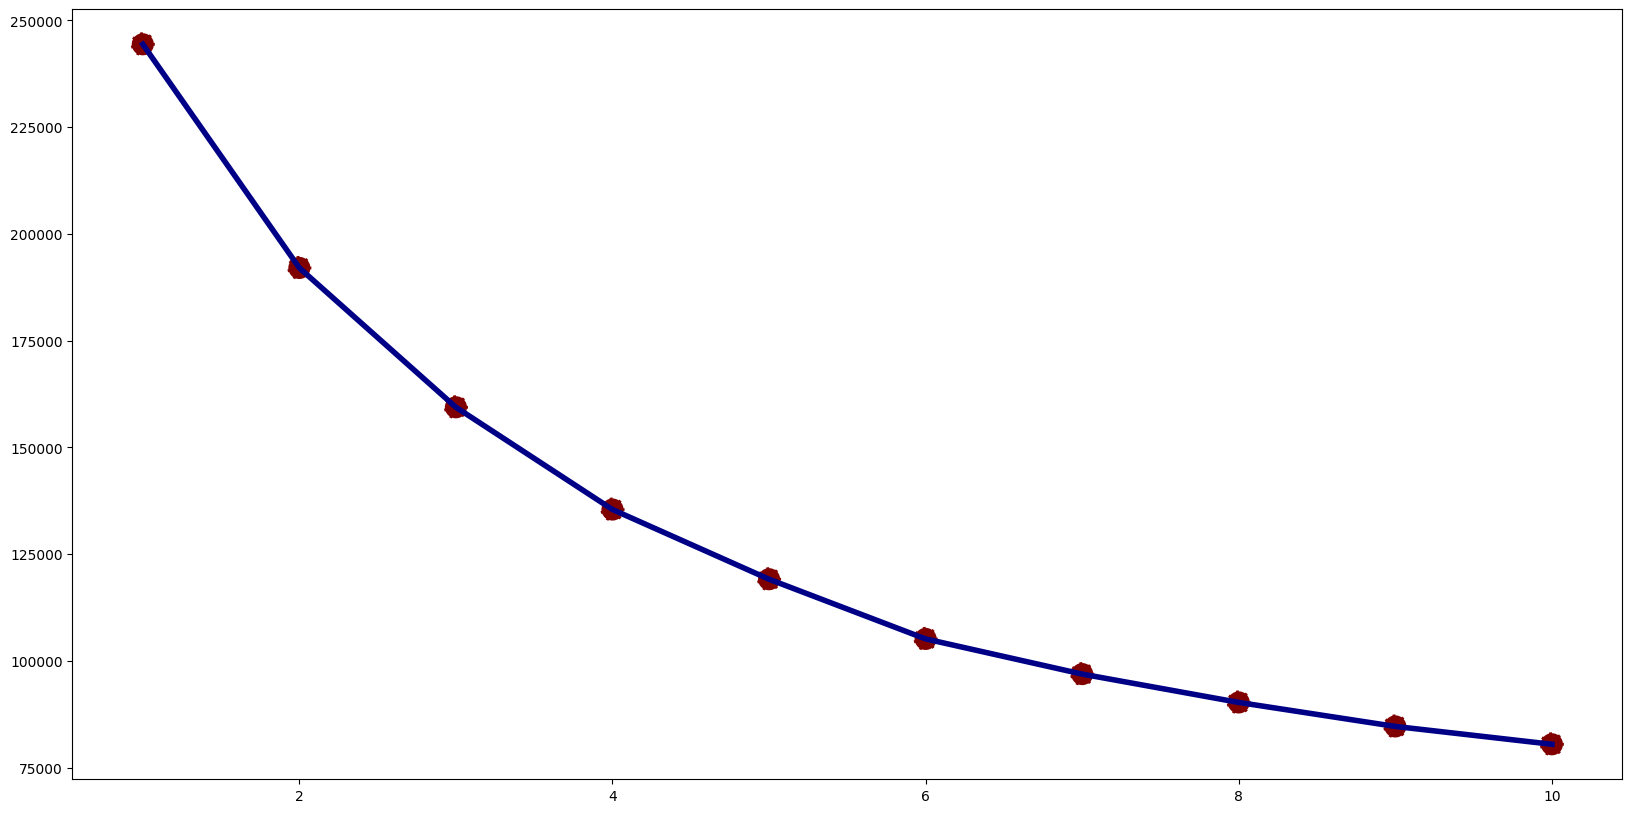

In [64]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')


## Clustering

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfs.values)

KMeans(n_clusters=4, random_state=0)

In [66]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,passenger_time,Flight_Count/Year,cluster
0,2.946823,-0.433412,2.186105,-0.640830,2.364728,3
1,3.151836,-0.776593,1.816499,0.463661,0.441358,3
2,3.006257,-0.242755,2.044803,2.258308,-0.290352,0
3,3.039276,1.225298,1.937261,0.669624,-0.609352,0
4,3.069732,-0.871921,1.869654,0.002352,1.326259,3


In [67]:
dfa['cluster'] = kmeans.labels_

In [68]:
display(dfa.groupby('cluster').agg(['mean','median']))

index                 AGE           SEG_KM_SUM           \
                 mean   median       mean median          mean   median   
cluster                                                                   
0        26201.736749  23285.0  45.556497   44.0  16742.503423  14812.0   
1        44778.385583  46579.0  42.490456   41.0   5888.175837   4660.0   
2        40122.234427  39883.5  40.120433   39.0   8193.562539   7187.5   
3        19449.407476  16176.0  40.683960   39.0  22041.938076  21288.0   

        LAST_TO_END        avg_discount           passenger_time             \
               mean median         mean    median           mean     median   
cluster                                                                       
0         86.409062   66.0     0.711096  0.713765      80.700126  80.428756   
1        423.737705  418.0     0.734503  0.744960      52.035658  48.033841   
2        113.195789   98.0     0.658341  0.663263      32.642721  31.015011   
3        104.022057   61.0     0.711473  0.714814      29.312891  24.936857   

        Flight_Count/Year            
                     mean    median  
cluster                              
0                2.281628  1.896227  
1                2.901803  1.701440  
2                3.640825  3.261094  
3               10.585646  9.987100

## PCA (Principal Component Analysis)

In [69]:
## PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

In [70]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfs['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,2.946505,2.369706,3
1,1.443945,2.781105,3
2,-1.909597,3.138136,0
3,-1.378216,1.735236,0
4,2.143560,2.767180,3


"PC 1": -0.140278
"PC 2": -2.032531

"cluster": 1
This means that the first data point has "PC 1" value of -0.140278, "PC 2" value of -2.032531, and belongs to cluster 1.

the x-axis corresponds to "PC 1" values and the y-axis corresponds to "PC 2" values.

<Axes: xlabel='PC 1', ylabel='PC 2'>

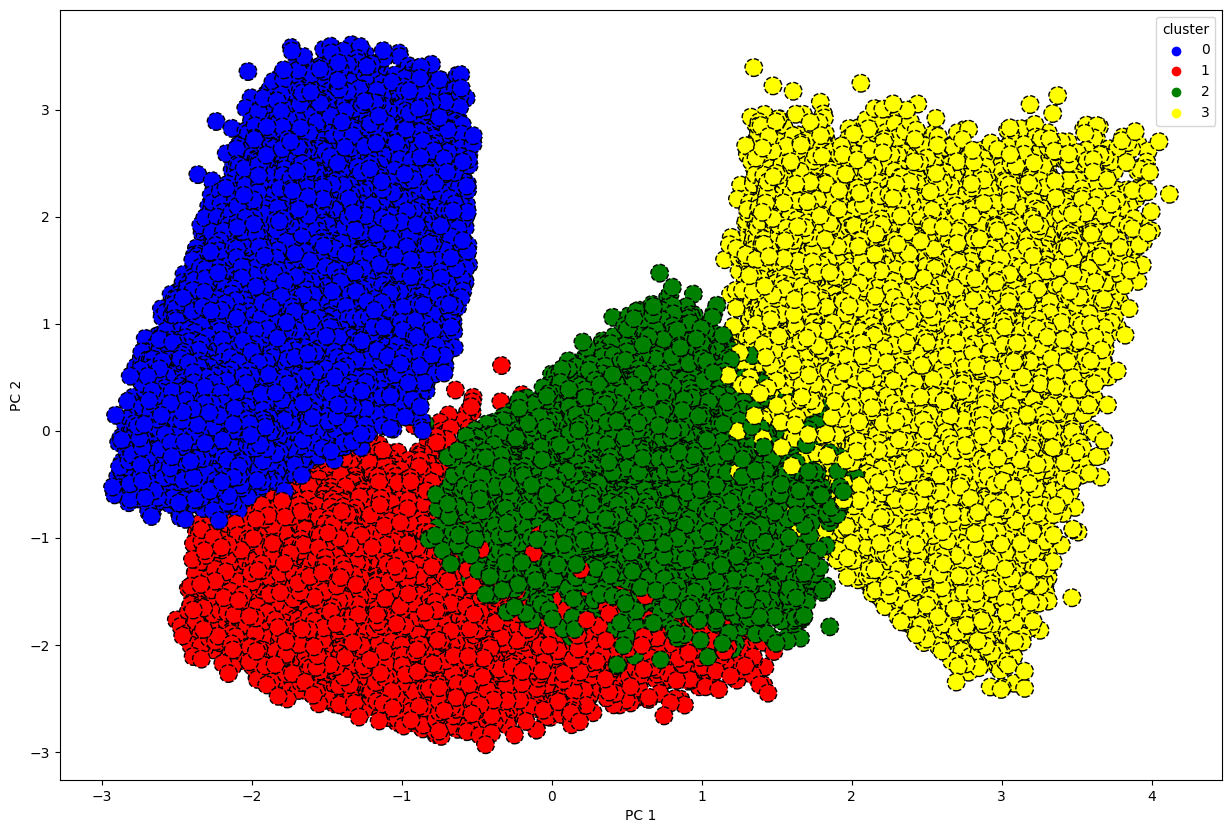

In [71]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2", # X and Y axes correspond to PC 1 and PC 2 values
    hue="cluster",
    edgecolor='black',  # Add black edge color to points
    linestyle='--',
    data=data_pca, # DataFrame containing the data
    palette=['blue','red','green','yellow'], # Define custom color palette for clusters
    s=160,
    ax=ax
)